## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_df=pd.merge(mouse_metadata, study_results, on ='Mouse ID', how='inner')
# Display the data table for preview
mousestudy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mousecount = len (mousestudy_df['Mouse ID'].drop_duplicates())
mousecount

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousestudy_df['combined']=mousestudy_df['Mouse ID'] + mousestudy_df['Timepoint'].astype(str)
mousestudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,combined
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940


In [4]:
duplicatemouseid=mousestudy_df.loc[mousestudy_df.duplicated(subset=["Mouse ID", 'Timepoint']),'Mouse ID']
duplicatemouseid

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
# Checking the number of mice in the clean DataFrame.
mousestudy2=mousestudy_df[mousestudy_df['Mouse ID'].isin(duplicatemouseid)==False]
len(mousestudy2['Mouse ID'].unique())

248

In [6]:
mousestudy2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,combined
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor1=mousestudy2[['Drug Regimen', 'Tumor Volume (mm3)']]
tumor2 = tumor1.groupby(['Drug Regimen'])
tumormean = (tumor2.mean())
tumormean =tumormean.rename(columns = {'Tumor Volume (mm3)': 'Tumor Volume Mean'})
tumor3=mousestudy2[['Drug Regimen', 'Tumor Volume (mm3)']]
tumor4 = tumor3.groupby(['Drug Regimen'])
tumormedian = (tumor4.median())
tumormedian =tumormedian.rename(columns = {'Tumor Volume (mm3)': 'Tumor Volume Median'})
tumorjoin1=pd.merge(tumormean, tumormedian, on = 'Drug Regimen', how='inner')
variance=mousestudy2.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
std=mousestudy2.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem=mousestudy2.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

pddf=pd.DataFrame({'Variance':variance, 'Standard Deviation':std, 'SEM':sem})
Stats=pd.merge(tumorjoin1, pddf, on ='Drug Regimen', how='inner')
Stats



,Tumor Volume Mean,Tumor Volume Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary=mousestudy2.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':["mean", "median", "var", "std", 'sem']})

# Using the aggregation method, produce the same summary statistics in a single line
Summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

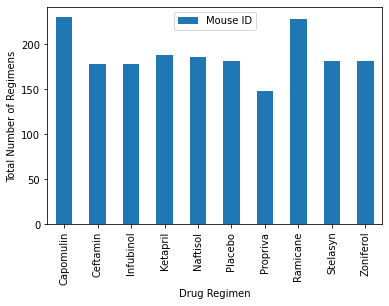

<Figure size 432x288 with 0 Axes>

In [9]:
treat=mousestudy2[['Drug Regimen', 'Mouse ID']]
treatment1 = treat.groupby(['Drug Regimen'])
treatment = (treatment1.count())
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_chart = treatment.plot(kind='bar')
count_chart.set_xlabel('Drug Regimen')
count_chart.set_ylabel('Total Number of Regimens')
plt.show()
plt.tight_layout()


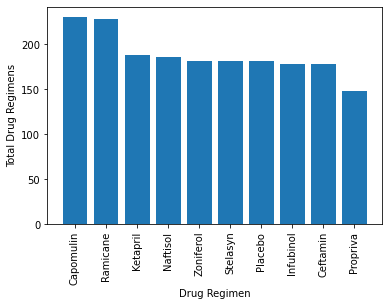

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
count=mousestudy2['Drug Regimen'].value_counts()
plt.bar(count.index.values,count.values)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Total Drug Regimens')
plt.show()


In [11]:
mf=mousestudy2[['Drug Regimen', 'Sex']]
sex1 = mf.groupby(['Sex'])
sex = (sex1.count())
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.05)
labels=['Female', 'Male']
sex

,Drug Regimen
Sex,
Female,922
Male,958


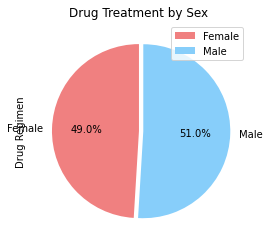

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex.plot(kind='pie', explode=explode, colors=colors, autopct='%1.1f%%', subplots=True, 
         startangle=90)
plt.title('Drug Treatment by Sex')
plt.show()


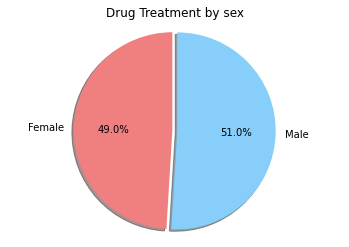

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.title('Drug Treatment by sex')
plt.pie(sex['Drug Regimen'], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Camp=mousestudy2.loc[mousestudy2['Drug Regimen']=='Capomulin']
Rami=mousestudy2.loc[mousestudy2['Drug Regimen']=='Ramicane']
Infu=mousestudy2.loc[mousestudy2['Drug Regimen']=='Infubinol']
Ceft=mousestudy2.loc[mousestudy2['Drug Regimen']=='Ceftamin']

SlctDrug=[Camp, Rami, Infu, Ceft]
SelectDrug=pd.concat(SlctDrug)
# Start by getting the last (greatest) timepoint for each mouse
temp=SelectDrug.groupby(['Mouse ID'])['Timepoint'].max()
temp=temp.reset_index()

Treatment=temp.merge(SelectDrug, on=['Mouse ID', 'Timepoint'], how='left')
Treatment

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,combined
0,a203,45,Infubinol,Female,20,23,67.973419,2,a20345
1,a251,45,Infubinol,Female,21,25,65.525743,1,a25145
2,a275,45,Ceftamin,Female,20,28,62.999356,3,a27545
3,a411,45,Ramicane,Male,3,22,38.407618,1,a41145
4,a444,45,Ramicane,Female,10,25,43.047543,0,a44445
...,...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4,y76945
96,y793,45,Capomulin,Male,17,17,31.896238,2,y79345
97,y865,45,Ceftamin,Male,23,26,64.729837,3,y86545
98,z578,45,Ramicane,Male,11,16,30.638696,0,z57845


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
Drugs=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
Volume=[]
for drug in Drugs:
    vol=Treatment.loc[Treatment['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    Volume.append(vol)
    quartiles = vol.quantile([.25, .5, .75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    outliers=vol.loc[(vol<lower_bound)|(vol>upper_bound)]
    print(f'{drug} outliers:{outliers}')

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers:15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


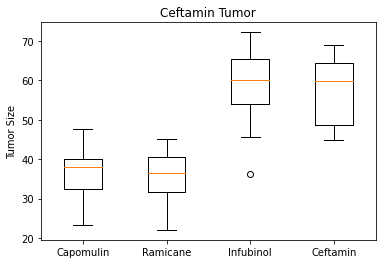

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Tumor')
#ax1.set_xlabel('Drugs')
ax1.set_ylabel('Tumor Size')
ax1.boxplot(Volume, labels=Drugs)
plt.show()

## Line and Scatter Plots

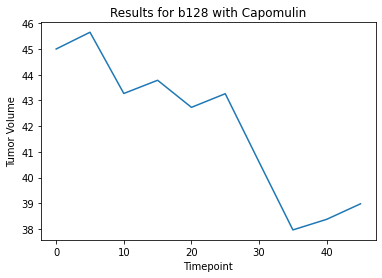

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
b128=Camp.loc[Camp['Mouse ID']=='b128']
x_axis=b128['Timepoint']
points=b128['Tumor Volume (mm3)']

plt.plot(x_axis, points)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Results for b128 with Capomulin')
plt.show()

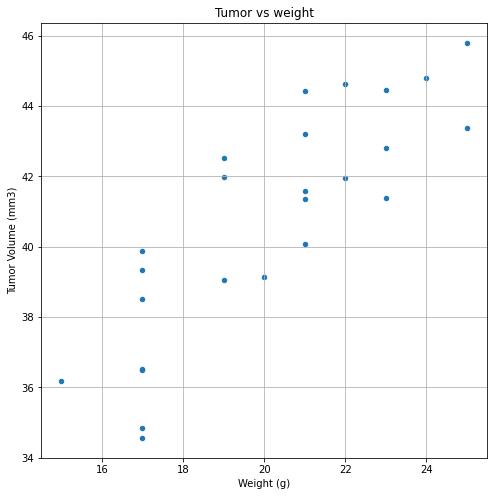

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Camp1=Camp[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
Camp2=Camp1.groupby(['Mouse ID'])
Campmean=(Camp2.mean())

Campmean.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid=True, figsize=(8,8),
           title='Tumor vs weight')
plt.show()

## Correlation and Regression

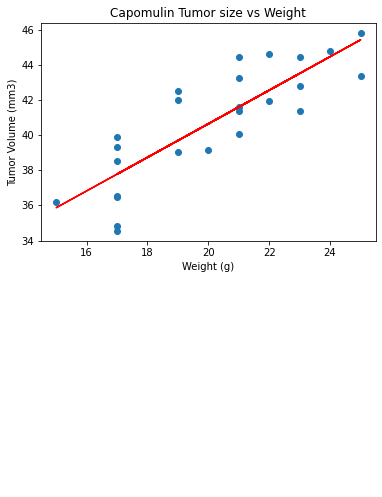

0.7088568047708717


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values=Campmean['Weight (g)']
y_values=Campmean['Tumor Volume (mm3)']
slope, intercept, r_value, p_value, std_err = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 20), fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Tumor size vs Weight')
plt.show()
print(r_value**2)